<a href="https://colab.research.google.com/github/victinj/Belajar/blob/main/Tugas04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIABETES DATASET**

## Diabetes


### Pengertian


Diabetes merupakan penyakit kronis yang berlangsung jangka panjang yang ditandai dengan meningkatnya kadar gula darah (glukosa) hingga di atas nilai normal.

### Faktor Risiko

Diabetes tipe 1

* Riwayat keluarga

* Geografi (area hunian)

* Usia (4 - 14 tahun)

Diabetes tipe 2

* Obesitas

* Usia (45 tahun keatas)

* Riwayat diabetes saat hamil


## Principal Component Analysis (PCA)



### Pengertian

PCA atau Principal Component Analysis adalah metode statistika yang menggunakan transformasi ortogonal untuk mengubah data 

### Pengaplikasian

* Reduksi dimensi dataset

* Mempercepat algoritma ML

* Visualisasi data


## Pengolahan data

### Import Library

In [ ]:
# untuk olah data
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import mean, median
from sklearn.utils.multiclass import type_of_target
# untuk model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import pyplot

### Dataset

Dataset dari pasien diabetes

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Korelasi antara outcome dengan kolom atau feature yang ada

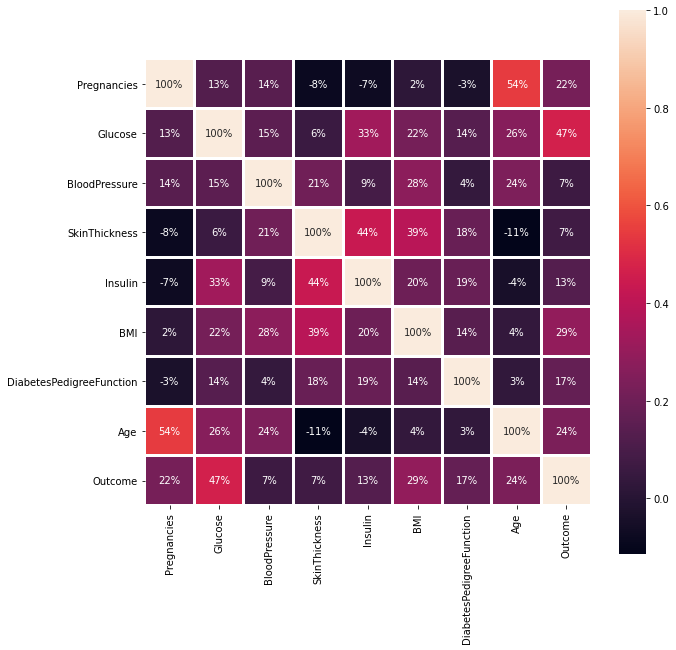

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot = True,  linewidths=2, square = True, fmt = '.0%')

### Explanatory Data Analysis

In [ ]:
# mengecek nilai yang hilang
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Pregnancies

Jumlah kehamilan

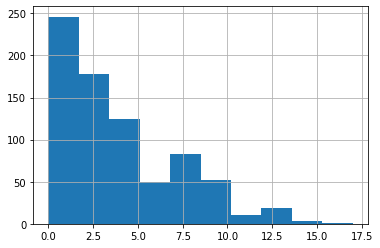

In [ ]:
df['Pregnancies'].hist()

Jumlah kehamilan pada data tidak memiliki nilai yang abnormal

#### Glucose

Jumlah konsentrasi glukosa dalam 2 jam di dalam tes oral toleransi glukosa

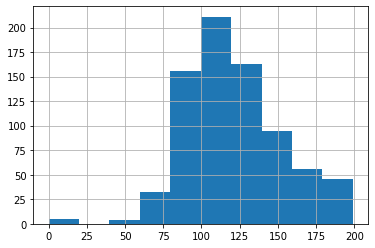

In [ ]:
df['Glucose'].hist()

Kadar glukosa manusia berkisar antara

* 70 - 130 miligram/desiliter sebelum makan

* < 140 miligram/desiliter setelah 2 jam setelah makan

* < 100 miligram/desiliter saat puasa

* 100 - 140 miligram/desiliter waktu tidur

terdapat nilai yang abnormal berupa 0

In [ ]:
df[df['Glucose'] == 0].groupby('Outcome')['Pregnancies'].count()

Outcome
0    3
1    2
Name: Pregnancies, dtype: int64

#### BloodPressure

Tekanan darah diastolik



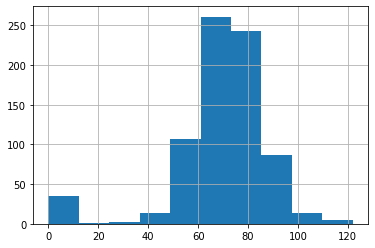

In [ ]:
df['BloodPressure'].hist()

Tekanan darah normal berkisar

* 56 - 71 pada anak anak

* 66 - 80 pada remaja

* 60 - 80 pada dewasa

* < 90 pada usia lanjut

terdapat nilai abnormal berupa 0 yang tidak sesuai dengan tekanan darah manusia pada umumnya

In [ ]:
df[df['BloodPressure'] == 0].groupby('Outcome')['Pregnancies'].count()

Outcome
0    19
1    16
Name: Pregnancies, dtype: int64

#### SkinThickness

Ketebalan lipatan kulit


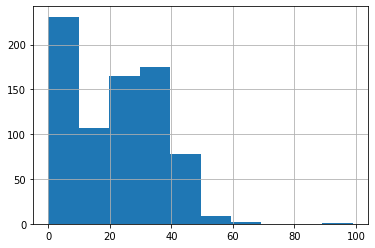

In [ ]:
df['SkinThickness'].hist()

Ketebalan lipatan kulit manusia pada normalnya diatas 2.5 mm untuk laki-laki dan 18 mm untuk perempuan

terdapat ketebalan lipatan kulit yang bernilai 0 yang tidak seharusnya dimiliki manusia

In [ ]:
df[df['SkinThickness'] == 0].groupby('Outcome')['Pregnancies'].count()

Outcome
0    139
1     88
Name: Pregnancies, dtype: int64

#### Insulin

Serum insulin (mu U/ml)

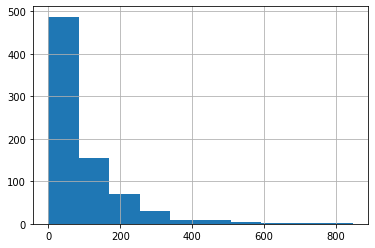

In [ ]:
df['Insulin'].hist()

Level insulin pada manusia berkisar

* < 25 saat puasa

* 30 - 230 30 menit setelah konsumsi glukosa

* 18 - 276 1 jam setelah konsumsi glukosa

* 16 - 166 2 jam setelah konsumsi glukosa

terdapat insulin yang bernilai 0 yang seharusnya tidak pada manusia normal

In [ ]:
df[df['Insulin'] == 0].groupby('Outcome')['Pregnancies'].count()

Outcome
0    236
1    138
Name: Pregnancies, dtype: int64

#### BMI

Indeks massa 

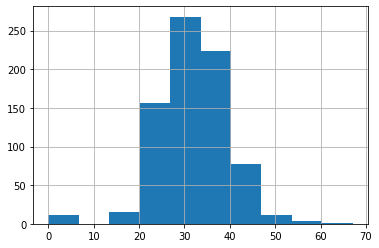

In [ ]:
df['BMI'].hist()

indeks massa yang bernilai 0 yang tidak seharusnya ada pada manusia

In [ ]:
df[df['BMI'] == 0].groupby('Outcome')['Pregnancies'].count()

Outcome
0    9
1    2
Name: Pregnancies, dtype: int64

#### DiabetesPedigreeFunction

Silsilah diabetes

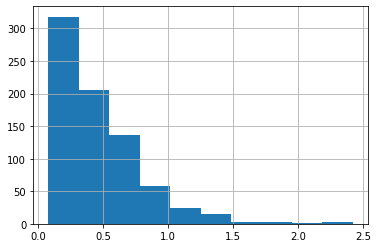

In [ ]:
df['DiabetesPedigreeFunction'].hist()

tidak terdapat nilai abnormal pada silsilah diabetes

#### Age

Umur

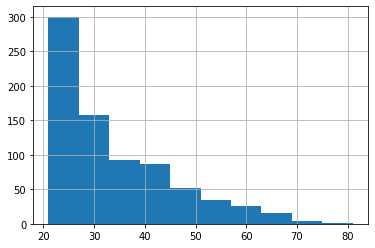

In [ ]:
df['Age'].hist()

Tidak ada keabnormalan pada umur

#### Handling Unexpected Abnormal Value

In [ ]:
# tabel nilai 0 yang menjadi ouliers pada dataset
table_outliers = pd.DataFrame({'Columns': ['Glucose',
                                           'BloodPressure',
                                           'SkinThickness',
                                           'Insulin', 
                                           'BMI'],
                               'Count of zero value': [df[df['Glucose']==0].shape[0],
                                                       df[df['BloodPressure']==0].shape[0],
                                                       df[df['SkinThickness']==0].shape[0],
                                                       df[df['Insulin']==0].shape[0],
                                                       df[df['BMI']==0].shape[0]]})

table_outliers

,Columns,Count of zero value
0,Glucose,5
1,BloodPressure,35
2,SkinThickness,227
3,Insulin,374
4,BMI,11


model pca sangat sensitif dengan outliers sehingga memerlukan penanganan khusus seperti menghapus semua outliers atau menggantinya dengan nilai lainnya.

sebagai perbandingan data akan dibagi menjadi tiga 

* data dengan abnormal value

* data dengan mengganti nilai abnormal dengan mean

* data dengan mengganti nilai abnormal dengan median

* data tanpa abnormal value

##### Data abnormal

In [ ]:
# data dengan outliers
df_abnormal = df.copy()

In [ ]:
table_df_abnormal= pd.DataFrame({'Columns': ['Glucose',
                                           'BloodPressure',
                                           'SkinThickness',
                                           'Insulin', 
                                           'BMI'],
                                  'Count of zero value': [df_abnormal[df_abnormal['Glucose']==0].shape[0],
                                                          df_abnormal[df_abnormal['BloodPressure']==0].shape[0],
                                                          df_abnormal[df_abnormal['SkinThickness']==0].shape[0],
                                                          df_abnormal[df_abnormal['Insulin']==0].shape[0],
                                                          df_abnormal[df_abnormal['BMI']==0].shape[0]]})

table_df_abnormal

,Columns,Count of zero value
0,Glucose,5
1,BloodPressure,35
2,SkinThickness,227
3,Insulin,374
4,BMI,11


##### Data dengan median

In [ ]:
# data dengan mengganti nilai outliers dengan median
df_median = df.copy()

In [ ]:
table_df_median = pd.DataFrame({'Columns': ['Glucose',
                                           'BloodPressure',
                                           'SkinThickness',
                                           'Insulin', 
                                           'BMI'],
                                'Count of zero value': [df_median[df_median['Glucose']==0].shape[0],
                                                        df_median[df_median['BloodPressure']==0].shape[0],
                                                        df_median[df_median['SkinThickness']==0].shape[0],
                                                        df_median[df_median['Insulin']==0].shape[0],
                                                        df_median[df_median['BMI']==0].shape[0]]})

table_df_median

,Columns,Count of zero value
0,Glucose,5
1,BloodPressure,35
2,SkinThickness,227
3,Insulin,374
4,BMI,11


In [ ]:
def mean_median_convert(data, means = False, medians = False):
  if means:
    data['Glucose'] = data['Glucose'].replace(0, mean(data['Glucose']))
    data['BloodPressure'] = data['BloodPressure'].replace(0, mean(data['BloodPressure']))
    data['SkinThickness'] = data['SkinThickness'].replace(0, mean(data['SkinThickness']))
    data['Insulin'] = data['Insulin'].replace(0, mean(data['Insulin']))
    data['BMI'] = data['BMI'].replace(0, mean(data['BMI']))
  elif medians:
    data['Glucose'] = data['Glucose'].replace(0, median(data['Glucose']))
    data['BloodPressure'] = data['BloodPressure'].replace(0, median(data['BloodPressure']))
    data['SkinThickness'] = data['SkinThickness'].replace(0, median(data['SkinThickness']))
    data['Insulin'] = data['Insulin'].replace(0, median(data['Insulin']))
    data['BMI'] = data['BMI'].replace(0, median(data['BMI']))
  
  return data

In [ ]:
df_median = mean_median_convert(df_median, medians = True)

In [ ]:
df_median.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [ ]:
table_df_median = pd.DataFrame({'Columns': ['Glucose',
                                           'BloodPressure',
                                           'SkinThickness',
                                           'Insulin', 
                                           'BMI'],
                                'Count of zero value': [df_median[df_median['Glucose']==0].shape[0],
                                                        df_median[df_median['BloodPressure']==0].shape[0],
                                                        df_median[df_median['SkinThickness']==0].shape[0],
                                                        df_median[df_median['Insulin']==0].shape[0],
                                                        df_median[df_median['BMI']==0].shape[0]]})

table_df_median

,Columns,Count of zero value
0,Glucose,0
1,BloodPressure,0
2,SkinThickness,0
3,Insulin,0
4,BMI,0


##### Data dengan mean

In [ ]:
# data dengan mengganti outliers dengan mean
df_mean = df.copy()

In [ ]:
table_df_mean = pd.DataFrame({'Columns': ['Glucose',
                                           'BloodPressure',
                                           'SkinThickness',
                                           'Insulin', 
                                           'BMI'],
                                'Count of zero value': [df_mean[df_mean['Glucose']==0].shape[0],
                                                        df_mean[df_mean['BloodPressure']==0].shape[0],
                                                        df_mean[df_mean['SkinThickness']==0].shape[0],
                                                        df_mean[df_mean['Insulin']==0].shape[0],
                                                        df_mean[df_mean['BMI']==0].shape[0]]})

table_df_mean

,Columns,Count of zero value
0,Glucose,5
1,BloodPressure,35
2,SkinThickness,227
3,Insulin,374
4,BMI,11


In [ ]:
df_mean = mean_median_convert(df_mean, means = True)

In [ ]:
table_df_mean = pd.DataFrame({'Columns': ['Glucose',
                                           'BloodPressure',
                                           'SkinThickness',
                                           'Insulin', 
                                           'BMI'],
                                'Count of zero value': [df_mean[df_mean['Glucose']==0].shape[0],
                                                        df_mean[df_mean['BloodPressure']==0].shape[0],
                                                        df_mean[df_mean['SkinThickness']==0].shape[0],
                                                        df_mean[df_mean['Insulin']==0].shape[0],
                                                        df_mean[df_mean['BMI']==0].shape[0]]})

table_df_mean

,Columns,Count of zero value
0,Glucose,0
1,BloodPressure,0
2,SkinThickness,0
3,Insulin,0
4,BMI,0


##### Data normal

In [ ]:
# data normal
df_normal= df.copy()

In [ ]:
table_df_normal = pd.DataFrame({'Columns': ['Glucose',
                                                'BloodPressure',
                                                'SkinThickness',
                                                'Insulin', 
                                                'BMI'],
                                    'Count of zero value': [df_normal[df_normal['Glucose']==0].shape[0],
                                                            df_normal[df_normal['BloodPressure']==0].shape[0],
                                                            df_normal[df_normal['SkinThickness']==0].shape[0],
                                                            df_normal[df_normal['Insulin']==0].shape[0],
                                                            df_normal[df_normal['BMI']==0].shape[0]]})

table_df_normal

,Columns,Count of zero value
0,Glucose,5
1,BloodPressure,35
2,SkinThickness,227
3,Insulin,374
4,BMI,11


In [ ]:
df_normal = df_normal[(df_normal['Glucose'] != 0) & (df_normal['BloodPressure'] != 0) & (df_normal['SkinThickness'] != 0) & (df_normal['Insulin'] != 0) & (df_normal['BMI'] != 0)] 

In [ ]:
table_df_normal = pd.DataFrame({'Columns': ['Glucose',
                                                'BloodPressure',
                                                'SkinThickness',
                                                'Insulin', 
                                                'BMI'],
                                     'Count of zero value': [df_normal[df_normal['Glucose']==0].shape[0],
                                                             df_normal[df_normal['BloodPressure']==0].shape[0],
                                                             df_normal[df_normal['SkinThickness']==0].shape[0],
                                                             df_normal[df_normal['Insulin']==0].shape[0],
                                                             df_normal[df_normal['BMI']==0].shape[0]]})

table_df_normal

,Columns,Count of zero value
0,Glucose,0
1,BloodPressure,0
2,SkinThickness,0
3,Insulin,0
4,BMI,0


##### Data normal dan no outliers

In [ ]:
df_no_outliers = df_normal.copy()
df_no_outliers.shape

(392, 9)

In [ ]:
def detect_outliers(data):
  columns = ['Pregnancies', 'Glucose',
             'BloodPressure', 'SkinThickness',
             'Insulin', 'BMI',
             'DiabetesPedigreeFunction', 'Age']
  count = 0
  th = 3
  for i in range(0,8):
    z = np.abs(stats.zscore(df_normal[columns[count]]))
    df = data[(z < 3)]
  return df

In [ ]:
df_no_outliers = detect_outliers(df_no_outliers)
df_no_outliers.shape

(386, 9)

#### Applied PCA

Untuk binary classification (1 atau 0) digunakan model LogisticRegression dan Support Vector Machine (SVM)

In [ ]:
# fungsi
def dataset(data):
  datax = data.drop(['Outcome'], axis = 1)
  datay = data['Outcome']
  return datax, datay

def models():
  model_normLR, model_stanLR, model_normSVC, model_stanSVC = dict(), dict(), dict(), dict()
  for i in range(1,9):
    # normalization dan logistic regression
    steps_normLR = [('norm', MinMaxScaler()), ('pca', PCA(n_components=i)), ('LR', LogisticRegression())]
    model_normLR[str(i)] = Pipeline(steps=steps_normLR)
    # standardization dan logistic regression
    steps_stanLR = [('stan', StandardScaler()), ('pca', PCA(n_components=i)), ('LR', LogisticRegression())]
    model_stanLR[str(i)] = Pipeline(steps=steps_stanLR)
    # normalization dan SVC
    steps_normSVC = [('norm', MinMaxScaler()), ('pca', PCA(n_components=i)), ('SVC', SVC())]
    model_normSVC[str(i)] = Pipeline(steps=steps_normSVC)
    # standardization dan SVC
    steps_stanSVC = [('stan', StandardScaler()), ('pca', PCA(n_components=i)), ('LR', SVC())]
    model_stanSVC[str(i)] = Pipeline(steps=steps_stanSVC)
  return model_normLR, model_stanLR, model_normSVC, model_stanSVC

def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs= -1, error_score='raise')
  return scores

def pengujian_reduksi_dimensi(data):
  X, y = dataset(data)
  model_normLR, model_stanLR, model_normSVC, model_stanSVC = models()
  result1, result2, result3, result4 = list(), list(), list(), list()
  name1, name2, name3, name4 = list(), list(), list(), list()
  list_models = [model_normLR, model_stanLR, model_normSVC, model_stanSVC]
  list_results = [result1, result2, result3, result4]
  list_names = [name1, name2, name3, name4]
  count = 0
  for lists in list_models:
    for name, model in lists.items():
      scores = evaluate_model(model, X, y)
      list_results[count].append(mean(scores))
      list_names[count].append(name)
    count +=1
  table_result = pd.DataFrame({'Norm_LR': name1,
                               'Result_NLR': result1,
                               'Stan_LR': name2,
                               'Result_SLR': result2,
                               'Norm_SVC': name3,
                               'Result_NSVC': result3,
                               'Stan_SVC': name4,
                               'Result_SSVC': result4})
  return table_result

##### Data abnormal

In [ ]:
tabel1 = pengujian_reduksi_dimensi(df_abnormal)
tabel1

,Norm_LR,Result_NLR,Stan_LR,Result_SLR,Norm_SVC,Result_NSVC,Stan_SVC,Result_SSVC
0,1,0.674228,1,0.716921,1,0.674211,1,0.709891
1,2,0.707809,2,0.716394,2,0.716664,2,0.721603
2,3,0.727105,3,0.727344,3,0.742707,3,0.732013
3,4,0.728154,4,0.723192,4,0.741374,4,0.731996
4,5,0.728411,5,0.743223,5,0.733824,5,0.742690
5,6,0.748725,6,0.765892,6,0.751798,6,0.762488
6,7,0.768503,7,0.768500,7,0.759094,7,0.766651
7,8,0.771374,8,0.774211,8,0.761699,8,0.760147


##### Data dengan median

In [ ]:
tabel2 = pengujian_reduksi_dimensi(df_median)
tabel2

,Norm_LR,Result_NLR,Stan_LR,Result_SLR,Norm_SVC,Result_NSVC,Stan_SVC,Result_SSVC
0,1,0.691658,1,0.724993,1,0.701576,1,0.722919
1,2,0.750519,2,0.724976,2,0.751555,2,0.724487
2,3,0.752604,3,0.735913,3,0.752081,3,0.746856
3,4,0.752601,4,0.735653,4,0.749730,4,0.738510
4,5,0.752351,5,0.736941,5,0.758076,5,0.730964
5,6,0.760167,6,0.761210,6,0.758086,6,0.744005
6,7,0.766688,7,0.771869,7,0.762761,7,0.757532
7,8,0.769026,8,0.771869,8,0.762249,8,0.756241


##### Data dengan mean

In [ ]:
tabel3 = pengujian_reduksi_dimensi(df_mean)
tabel3

,Norm_LR,Result_NLR,Stan_LR,Result_SLR,Norm_SVC,Result_NSVC,Stan_SVC,Result_SSVC
0,1,0.691394,1,0.727061,1,0.701576,1,0.726288
1,2,0.753380,2,0.726794,2,0.750513,2,0.726818
2,3,0.757567,3,0.736435,3,0.752085,3,0.746593
3,4,0.758869,4,0.735386,4,0.751039,4,0.734098
4,5,0.754959,5,0.736938,5,0.755977,5,0.731234
5,6,0.756781,6,0.762519,6,0.755984,6,0.747392
6,7,0.766948,7,0.771603,7,0.761989,7,0.757536
7,8,0.769282,8,0.772389,8,0.764586,8,0.759600


##### Data normal

In [ ]:
tabel4 = pengujian_reduksi_dimensi(df_normal)
tabel4

,Norm_LR,Result_NLR,Stan_LR,Result_SLR,Norm_SVC,Result_NSVC,Stan_SVC,Result_SSVC
0,1,0.768821,1,0.748410,1,0.771385,1,0.751474
1,2,0.776474,2,0.746949,2,0.778500,2,0.757179
2,3,0.782564,3,0.772372,3,0.766231,3,0.748910
3,4,0.780513,4,0.772397,4,0.757013,4,0.742244
4,5,0.778987,5,0.768321,5,0.747846,5,0.732603
5,6,0.784641,6,0.777423,6,0.758500,6,0.744282
6,7,0.786179,7,0.778449,7,0.768231,7,0.741192
7,8,0.783090,8,0.778436,8,0.772795,8,0.759564


##### Data normal dan no outliers

In [ ]:
tabel5 = pengujian_reduksi_dimensi(df_no_outliers)
tabel5

,Norm_LR,Result_NLR,Stan_LR,Result_SLR,Norm_SVC,Result_NSVC,Stan_SVC,Result_SSVC
0,1,0.735722,1,0.748691,1,0.729528,1,0.754831
1,2,0.775587,2,0.747665,2,0.769879,2,0.758529
2,3,0.783306,3,0.772996,3,0.768893,3,0.754345
3,4,0.782281,4,0.770378,4,0.768367,4,0.751673
4,5,0.784345,5,0.771930,5,0.760594,5,0.744467
5,6,0.790553,6,0.787530,6,0.769879,6,0.756397
6,7,0.796289,7,0.785924,7,0.782834,7,0.756370
7,8,0.789028,8,0.785924,8,0.777072,8,0.762038


### Final model

model yang dipilih berupa data normal_no_outliers dengan normalisasi sebagai model final karena mendapatkan akurasi yang tinggi

In [ ]:
X, y = dataset(df_no_outliers)

#### LogisticRegression


PCA

In [ ]:
# menggunakan dimensi n = 7
stepLR_pca =  [('norm', MinMaxScaler()), ('pca', PCA(n_components=7)), ('LR', LogisticRegression())]
modelLR_pca = Pipeline(steps = stepLR_pca)
modelLR_pca.fit(X, y)

Pipeline(memory=None,
         steps=[('norm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=7,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
y_predictLR_pca = modelLR_pca.predict(X)
acc_lr_pca = accuracy_score(y, y_predictLR_pca)

No PCA

In [ ]:
stepLR = [('norm', MinMaxScaler()), ('LR', LogisticRegression())]
modelLR = Pipeline(steps=stepLR)
modelLR.fit(X, y)

Pipeline(memory=None,
         steps=[('norm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
y_predictLR = modelLR.predict(X)
acc_lr = accuracy_score(y, y_predictLR)

#### SVM (SVC)

PCA

In [ ]:
# menggunakan dimensi n = 7
stepSVC_pca = [('norm', MinMaxScaler()), ('pca', PCA(n_components=7)), ('SVC', SVC())]
modelSVC_pca = Pipeline(steps = stepSVC_pca)
modelSVC_pca.fit(X, y)

Pipeline(memory=None,
         steps=[('norm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=7,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('SVC',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_predictSVC_pca = modelSVC_pca.predict(X)
acc_svc_pca = accuracy_score(y, y_predictSVC_pca)

No PCA

In [ ]:
stepSVC = [('norm', MinMaxScaler()), ('SVC', SVC())]
modelSVC = Pipeline(steps = stepSVC)
modelSVC.fit(X,y)

Pipeline(memory=None,
         steps=[('norm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('SVC',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_predictSVC = modelSVC.predict(X)
acc_svc = accuracy_score(y, y_predictSVC)

# Kesimpulan

* Metode PCA sangat sensitif terhadap data outliers

* Reduksi dimensi membantu model untuk mempercepat proses

* Reduksi dimensi dapat meningkatkan accuracy

* Reduksi dimensi mengurangi overfitting pada model

In [ ]:
acc = [acc_lr_pca, acc_lr, acc_svc_pca, acc_svc]
model = ['LR_PCA', "LR", 'SVC_PCA', 'SVC']
tabel_akhir = pd.DataFrame({'Model': model, "Score": acc})
tabel_akhir

,Model,Score
0,LR_PCA,0.797927
1,LR,0.797927
2,SVC_PCA,0.834197
3,SVC,0.823834


# Reference

https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8

https://www.kaggle.com/saurabh00007/diabetescsv

https://stackoverflow.com/questions/47693021/editing-row-of-one-dataframe-appears-to-affect-another-pandas-python

https://www.w3schools.com/python/python_ml_mean_median_mode.asp

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/

https://stackoverflow.com/questions/48508036/sklearn-stratifiedkfold-valueerror-supported-target-types-are-binary-mul/48512157

https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02

https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=and%20ElasticNet%20models.-,Logistic%20Regression%20Feature%20Importance,a%20crude%20feature%20importance%20score.